In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing training set

In [61]:
dataset_train = pd.read_csv('prices/coin_Ethereum.csv')
training_set = dataset_train.iloc[:, 7:8].values

In [4]:
print(training_set)

[[  144.53999329]
 [  139.        ]
 [  116.98999786]
 ...
 [35287.77976616]
 [33746.00245614]
 [34235.19345116]]


Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
print(training_set_scaled)

[[0.00119979]
 [0.00111246]
 [0.00076549]
 ...
 [0.5552035 ]
 [0.53089867]
 [0.53861036]]


Data Structure with 60 timesteps and 1 output

In [7]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

In [8]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
print(x_train)
print(y_train)

[[0.00119979 0.00111246 0.00076549 ... 0.00055993 0.00056072 0.00052031]
 [0.00111246 0.00076549 0.00057979 ... 0.00056072 0.00052031 0.00041331]
 [0.00076549 0.00057979 0.00046219 ... 0.00052031 0.00041331 0.00041874]
 ...
 [0.00818707 0.0082645  0.00823871 ... 0.00855144 0.00857101 0.0085406 ]
 [0.0082645  0.00823871 0.00818743 ... 0.00857101 0.0085406  0.00857696]
 [0.00823871 0.00818743 0.00825525 ... 0.0085406  0.00857696 0.008585  ]]
[0.00041331 0.00041874 0.00044428 ... 0.00857696 0.008585   0.00864964]


Reshaping

In [10]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

Building the LSTM

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
model = Sequential()
model.add(LSTM(units=50, return_sequences =True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences =True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units = 1 ))

In [13]:
import tensorflow as tf

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

In [71]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 6s 94ms/step - loss: 1.1048e-06
Epoch 2/100
38/38 [==============================] - 3s 87ms/step - loss: 1.5557e-06
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 9.0038e-07
Epoch 4/100
38/38 [==============================] - 4s 114ms/step - loss: 1.1440e-06
Epoch 5/100
38/38 [==============================] - 4s 93ms/step - loss: 9.5130e-07
Epoch 6/100
38/38 [==============================] - 4s 109ms/step - loss: 8.6293e-07
Epoch 7/100
38/38 [==============================] - 4s 93ms/step - loss: 8.3825e-07
Epoch 8/100
38/38 [==============================] - 3s 90ms/step - loss: 1.1849e-06
Epoch 9/100
38/38 [==============================] - 4s 94ms/step - loss: 7.6933e-07
Epoch 10/100
38/38 [==============================] - 3s 85ms/step - loss: 8.1422e-07
Epoch 11/100
38/38 [==============================] - 3s 91ms/step - loss: 1.1037e-06
Epoch 12/100
38/38 [==============================] - 3s 88m

Save Model

In [83]:
import joblib
filename = 'ETH_model.pkl'
joblib.dump(model, filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-26 22:

['ETH_model.pkl']

In [72]:
import joblib
filename = 'Bitcoin_model.sav'
joblib.dump(model, filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...layers\dropout_2
......vars
...layers\lstm
......vars
...layers\lstm\cell
......vars
.........0
.........1
.........2
...layers\lstm_1
......vars
...layers\lstm_1\cell
......vars
.........0
.........1
.........2
...layers\lstm_2
......vars
...layers\lstm_2\cell
......vars
.........0
.........1
.........2
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-02-26 21:

['Bitcoin_model.sav']

Getting the real stock price of 2022

In [73]:
dataset_test = pd.read_csv('test-prices/ETH-USD.csv')
real_stock_price = dataset_test.iloc[:, 4:5].values

Getting the predicted stock price of 2017

In [74]:
dataset_total = pd.concat((dataset_train['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [75]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [76]:
print(inputs)

[[0.06044321]
 [0.06085618]
 [0.06122584]
 [0.06463732]
 [0.05860197]
 [0.05748744]
 [0.06322416]
 [0.05627319]
 [0.05547527]
 [0.05066549]
 [0.05220521]
 [0.03771179]
 [0.04281331]
 [0.03723795]
 [0.03511112]
 [0.032177  ]
 [0.04059524]
 [0.04158898]
 [0.04445915]
 [0.04205969]
 [0.03706904]
 [0.03485587]
 [0.0366024 ]
 [0.04172008]
 [0.04043645]
 [0.04158103]
 [0.04392992]
 [0.04129838]
 [0.04039008]
 [0.0417224 ]
 [0.03975457]
 [0.03860655]
 [0.04003838]
 [0.03788266]
 [0.03602643]
 [0.03632147]
 [0.03846393]
 [0.03892897]
 [0.04008047]
 [0.03624547]
 [0.03631387]
 [0.03410264]
 [0.03326345]
 [0.0343333 ]
 [0.02869103]
 [0.02847826]
 [0.03028777]
 [0.03026759]
 [0.02750509]
 [0.02775766]
 [0.03011686]
 [0.0317053 ]
 [0.03298394]
 [0.03477758]
 [0.03224046]
 [0.03281483]
 [0.03401407]
 [0.03552128]
 [0.03358005]
 [0.03556786]
 [0.05834735]
 [0.05929112]
 [0.05821625]
 [0.05873136]
 [0.05489012]
 [0.05280958]
 [0.04925953]
 [0.0476636 ]
 [0.04870055]
 [0.0475237 ]
 [0.04996736]
 [0.05

In [77]:
x_test = []
for i in range(60, len(inputs)):
  x_test.append(inputs[i-60:i, 0])
  #20 days in a month

x_test = np.array(x_test)

In [78]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [79]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

12/12 [==============================] - 1s 36ms/step


In [80]:
print(predicted_stock_price)

[[2184.622  ]
 [2334.5894 ]
 [2599.338  ]
 [2916.6619 ]
 [3229.1396 ]
 [3473.146  ]
 [3615.9968 ]
 [3643.009  ]
 [3568.7532 ]
 [3434.9756 ]
 [3272.526  ]
 [3123.1477 ]
 [3017.863  ]
 [2950.5457 ]
 [2919.5708 ]
 [2919.1272 ]
 [2941.622  ]
 [2965.5352 ]
 [2979.0125 ]
 [2975.4126 ]
 [2950.4138 ]
 [2872.8916 ]
 [2742.0066 ]
 [2595.0027 ]
 [2451.684  ]
 [2330.5464 ]
 [2242.6313 ]
 [2186.2363 ]
 [2168.6992 ]
 [2188.4243 ]
 [2234.737  ]
 [2301.7893 ]
 [2386.5269 ]
 [2467.2852 ]
 [2532.1733 ]
 [2603.3035 ]
 [2681.9812 ]
 [2763.1262 ]
 [2844.5024 ]
 [2916.0852 ]
 [2980.944  ]
 [3021.4004 ]
 [3021.6216 ]
 [2986.271  ]
 [2925.6426 ]
 [2858.2686 ]
 [2817.7275 ]
 [2804.7053 ]
 [2791.1401 ]
 [2761.8083 ]
 [2717.45   ]
 [2654.7761 ]
 [2578.7422 ]
 [2506.961  ]
 [2445.6006 ]
 [2399.883  ]
 [2385.921  ]
 [2402.93   ]
 [2427.5305 ]
 [2475.3113 ]
 [2545.7217 ]
 [2624.9512 ]
 [2690.1099 ]
 [2714.189  ]
 [2702.7476 ]
 [2658.408  ]
 [2589.3147 ]
 [2516.8394 ]
 [2467.0737 ]
 [2434.5872 ]
 [2411.3542 ]
 [2395

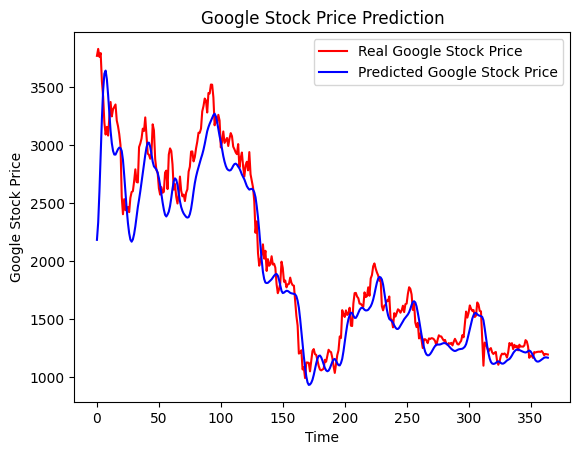

In [81]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()